# Final Project

In [66]:
# Loading libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import StandartScaler

In [67]:
# Loading data

data_train = pd.read_csv ("data/features.csv")
data_test = pd.read_csv ("data/features_test.csv")

In [68]:
# Deleting features that contain match results,
y = data_train.iloc[:,104]
data_cols_names = list(data_train.columns.values)

data_train = data_train.iloc[:,:103]
print (data_cols_names[104])

radiant_win


In [69]:
## Counting number of heroes

match_cols = ['r1_hero','r2_hero','r3_hero','r4_hero','r5_hero','d1_hero','d2_hero','d3_hero','d4_hero','d5_hero']
l1 = list(np.unique(data_train.ix[:,match_cols]))
l2 = list(np.unique(data_test.ix[:,match_cols]))

N = len(np.unique(np.hstack((l1,l2))))
print ("Number of unique heroes: ",N)


('Number of unique heroes: ', 108)


In [70]:
# Looking at columns that contain missing values in train data

empties = (data_train.count()!=data_train.shape[0])
missing_cols_names = list(data_train.loc[:,empties].columns.values)
print ("Number of missing columns",sum(empties))
print (missing_cols_names)

('Number of missing columns', 12)
['first_blood_time', 'first_blood_team', 'first_blood_player1', 'first_blood_player2', 'radiant_bottle_time', 'radiant_courier_time', 'radiant_flying_courier_time', 'radiant_first_ward_time', 'dire_bottle_time', 'dire_courier_time', 'dire_flying_courier_time', 'dire_first_ward_time']


In [71]:
# Looking at columns that contain missing values in test data

empties = (data_test.count()!=data_test.shape[0])
missing_cols_names = list(data_test.loc[:,empties].columns.values)
print ("Number of missing columns",sum(empties))
print (missing_cols_names)

('Number of missing columns', 12)
['first_blood_time', 'first_blood_team', 'first_blood_player1', 'first_blood_player2', 'radiant_bottle_time', 'radiant_courier_time', 'radiant_flying_courier_time', 'radiant_first_ward_time', 'dire_bottle_time', 'dire_courier_time', 'dire_flying_courier_time', 'dire_first_ward_time']


In [72]:
# Filling NAs with zeros

data_train = data_train.fillna(value=0)
data_test = data_test.fillna(value=0)

col_names = list(data_train.columns.values)

In [73]:
# Scalling the data

scaler = StandardScaler()
data_train.iloc[:,:] = scaler.fit_transform(data_train)  # compute mean, std and transform training data as well
data_test.iloc[:,:] = scaler.transform(data_test)  # same as above

In [17]:
# Logistic regression with different C values

X_cross = KFold(data_train.shape[0],n_folds=5,random_state=42, shuffle =True)

estim_pars = [1e-5,5e-5,1e-4,5e-4,1e-3,2e-3,3e-3,4e-3,5e-3,6e-3,7e-3,8e-3,9e-3,1e-2,1e-1,1,10]

scores_arr = []

for C_par in estim_pars:
    clf = LogisticRegression (penalty='l2', C = C_par)
    scores = cross_val_score (clf, data_train, y, cv = X_cross, scoring='roc_auc')
    scores_arr.append(scores.mean())
    print ("C param:",C_par," score:",scores.mean())


C param: 1e-05  score: 0.695214442359
C param: 5e-05  score: 0.70707668095
C param: 0.0001  score: 0.711437174977
C param: 0.0005  score: 0.715968721959
C param: 0.0008  score: 0.716343231922
C param: 0.001  score: 0.716452183665
C param: 0.02  score: 0.716626887268
C param: 0.003  score: 0.716640093403
C param: 0.004  score: 0.716649318005
C param: 0.005  score: 0.716648905469
C param: 0.006  score: 0.71664637495
C param: 0.007  score: 0.716644556648
C param: 0.008  score: 0.716642672229
C param: 0.009  score: 0.71664022966
C param: 0.01  score: 0.716639000088
C param: 0.1  score: 0.716613454778
C param: 1  score: 0.716609443383
C param: 10  score: 0.71660885449


In [130]:
print (scores_arr,"\n")
print ("Maximum score: ",max(scores_arr))

[0.69515567248489463, 0.70704436843023311, 0.71141854079032463, 0.71598311079702137, 0.71646867232089417, 0.71666669677826844, 0.716657444790048, 0.7166388847818338, 0.71663614484569604, 0.71663384323825707, 0.71663332739232843, 0.71663281472045437] 

Maximum score:  0.716666696778


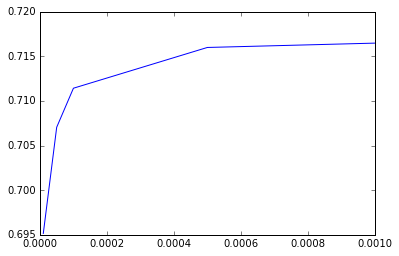

In [131]:
plt.plot(estim_pars[0:5], scores_arr[0:5])
plt.show()

In [11]:
# Cross Validation with different number of trees

rem_cols = ['lobby_type','r1_hero','r2_hero','r3_hero','r4_hero','r5_hero','d1_hero','d2_hero','d3_hero','d4_hero','d5_hero']
mask = np.in1d(col_names, rem_cols)

X_cross = KFold(data_train.shape[0],n_folds=5,random_state=42, shuffle =True)

estim_pars = [1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2,5e-2,1e-1,5e-1,1,10]
scores_arr = []

for C_par in estim_pars:
    clf = LogisticRegression (penalty='l2', C = C_par)
    scores = cross_val_score (clf, data_train.iloc[:,~mask], y, cv = X_cross, scoring='roc_auc')
    scores_arr.append(scores.mean())
    print ("C param:",C_par," score:",scores.mean())

('C param:', 1e-05, ' score:', 0.69515567248489463)
('C param:', 5e-05, ' score:', 0.70704436843023311)
('C param:', 0.0001, ' score:', 0.71141854079032463)
('C param:', 0.0005, ' score:', 0.71598311079702137)
('C param:', 0.001, ' score:', 0.71646867232089417)
('C param:', 0.005, ' score:', 0.71666669677826844)
('C param:', 0.01, ' score:', 0.716657444790048)
('C param:', 0.05, ' score:', 0.7166388847818338)
('C param:', 0.1, ' score:', 0.71663614484569604)
('C param:', 0.5, ' score:', 0.71663384323825707)
('C param:', 1, ' score:', 0.71663332739232843)
('C param:', 10, ' score:', 0.71663281472045437)


In [74]:
data_train = pd.DataFrame(data_train)
data_test = pd.DataFrame(data_test)



# N — количество различных героев в выборке
X_pick_train = np.zeros((data_train.shape[0], N))

for i, match_id in enumerate(data_train.index):
    for p in range(5):
        X_pick_train[i, data_train.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick_train[i, data_train.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

        
# N — количество различных героев в выборке

X_pick_test = np.zeros((data_test.shape[0], N))

for i, match_id in enumerate(data_test.index):
    for p in range(5):
        X_pick_test[i, data_test.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick_test[i, data_test.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

    

/home/sirorezka/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/sirorezka/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/sirorezka/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/sirorezka/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [75]:
data_train = pd.concat([data_train, pd.DataFrame(X_pick_train)],axis=1)
data_test = pd.concat([data_test, pd.DataFrame(X_pick_test)],axis=1)

X_pick_train = []
X_pick_test = []

print (data_train.shape)

(97230, 211)


In [83]:
# Cross Validation with different number of trees
col_names = list(data_train.columns.values)

rem_cols = ['lobby_type','r1_hero','r2_hero','r3_hero','r4_hero','r5_hero','d1_hero','d2_hero','d3_hero','d4_hero','d5_hero']
mask = np.in1d(col_names, rem_cols)

X_cross = KFold(data_train.shape[0],n_folds=5,random_state=42, shuffle =True)

estim_pars = [1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2,5e-2,1e-1,5e-1,1,10]
scores_arr = []

for C_par in estim_pars:
    clf = LogisticRegression (penalty='l2', C = C_par)
    scores = cross_val_score (clf, data_train.iloc[:,~mask], y, cv = X_cross, scoring='roc_auc')
    scores_arr.append(scores.mean())
    print ("C param:",C_par," score:",scores.mean())

('C param:', 1e-05, ' score:', 0.69533878122880266)
('C param:', 5e-05, ' score:', 0.70741372355244958)
('C param:', 0.0001, ' score:', 0.7118603989995369)
('C param:', 0.0005, ' score:', 0.71647988190911005)
('C param:', 0.001, ' score:', 0.71696254124834302)
('C param:', 0.005, ' score:', 0.71715577483763515)
('C param:', 0.01, ' score:', 0.71714421955484164)
('C param:', 0.05, ' score:', 0.71712001745894205)
('C param:', 0.1, ' score:', 0.71711692244276126)
('C param:', 0.5, ' score:', 0.7171133465804016)
('C param:', 1, ' score:', 0.71711261887921729)
('C param:', 10, ' score:', 0.71711272168589724)


In [87]:
clf = LogisticRegression (penalty='l2', C = 0.005)
clf.fit(data_train,y)

pred = clf.predict_proba(data_test)[:, 1]

In [93]:
print("min prob value: ",pred.min())
print("max prob value: ",pred.max())

('min prob value: ', 0.0073836821292843661)
('max prob value: ', 0.98731135024948979)
